# 2 Concepts

## 2.4 Bellman Optimality Equation

### Motivating Example
<center>
<img src="../Images/demonstrating-policy-improvement.png" alt="An Example for Demonstrating Policy Improvement">
</center>

如图所示：当前策略不是一个“好”的策略，因为它在状态$s_1$时选择了动作$a_2$而不是$a_3$。

**如何对当前策略进行改进？**

首先，我们根据计算各个状态的价值：
$$
v_{\pi}(s_1) = -1 + \gamma v_{\pi}(s_2) = -1 + \frac{0.9}{1-0.9} = 8 \\
v_{\pi}(s_2) = +1 + \gamma v_{\pi}(s_4) = +1 + \frac{0.9}{1-0.9} = 10 \\
v_{\pi}(s_3) = +1 + \gamma v_{\pi}(s_4) = +1 + \frac{0.9}{1-0.9} = 10\\
v_{\pi}(s_4) = +1 + \gamma v_{\pi}(s_4) = +1 + \frac{0.9}{1-0.9} = 10\\
$$

接着计算状态$s_1$可能采取的动作对应的动作价值：
$$
q_{\pi}(s_1, a_1) = -1 + \gamma v_{\pi}(s_1) = -1 + \gamma 8 = 6.2 \\
q_{\pi}(s_1, a_2) = -1 + \gamma v_{\pi}(s_2) = -1 + \gamma 10 = 8 \\
q_{\pi}(s_1, a_3) = -1 + \gamma v_{\pi}(s_3) = 0 + \gamma 10 = 9 \\
q_{\pi}(s_1, a_4) = -1 + \gamma v_{\pi}(s_4) = -1 + \gamma 10 = 8 \\
q_{\pi}(s_1, a_5) = -1 + \gamma v_{\pi}(s_1) = 0 + \gamma 8 = 7.2 \\
$$

**Policy Improvement:** 因为$q_{\pi}(s_1, a_3) \geq q_{\pi}(s_1, a_i), \ \ i \neq 3$,故动作$a_3$更好，因此策略更新在状态$s_1$时选择动作$a_3$。

**这个示例过程是许多强化学习算法的核心思想：先计算各个状态的价值，并根据价值计算各个状态可能采取的动作对应的动作价值，选择动作价值最大的动作来更新各状态下的策略。**

### Optimal State Values and Optimal Policies
强化学习的核心目标是：得到最优策略。

通常我们使用状态价值来评价策略好坏，对于给定的两个策略$\pi_1$和$\pi_2$，如果满足:
$$v_{\pi_1}(s) \geq v_{\pi_2}(s), \ \ \ \ \forall s \in \cal S $$
那么认为策略$\pi_1$是优于策略$\pi_2$的。

如果存在一个策略$\pi^*$，在任意状态$s$和任意策略$\pi$上都有
$$v_{\pi^*}(s) \geq v_{\pi}(s), \ \ \ \ \forall s \in \cal S $$
那么称$\pi^*$是最优策略，最优策略对应的状态价值是最优状态价值。

换句话说：**最优策略与其他策略相比，在任意状态下具有最大的状态价值。**

### Bellman Optimality Equation (BOE)
对于$\forall s \in \cal S$，Bellman Optimality Equation (BOE)为：
$$
\begin{aligned}
v_{\pi}(s) &= \max_{\pi(s) \in \prod (s)} \sum_{a \in \cal A(s)} \pi(a|s) \Big [\sum_{r \in R(s, a)} p(r | s, a) r + \gamma \sum_{s' \in \cal S} p(s' | s, a) v_{\pi}(s') \Big] \\
&= \max_{\pi(s) \in \prod (s)} \sum_{a \in \cal A(s)} \pi(a|s) q(s, a)
\end{aligned}
$$

其中，$v_{\pi}(s)$和$v_{\pi}(s')$是要求解的变量；$\pi(s)$是状态$s$的策略，而$\prod (s)$是所有可能的策略的集合；动作价值函数表示如下：
$$
q(s,a) \overset{\cdot}= \sum_{r \in R(s, a)} p(r | s, a) r + \gamma \sum_{s' \in \cal S} p(s' | s, a) v_{\pi}(s')
$$

### Theoretical Analysis of the Solution to Bellman Optimality Equation
Bellman Optimality Equation如下：
$$
\begin{aligned}
v_{\pi}(s) &= \max_{\pi(s) \in \prod (s)} \sum_{a \in \cal A(s)} \pi(a|s) q(s, a)
\end{aligned}
$$

由于$\sum_{a \in \cal A(s)} \pi(a|s) = 1$，因此：

$$
\sum_{a \in \cal A(s)} \pi(a|s) q(s, a) \leq \sum_{a \in \cal A(s)} \pi(a|s) \max_{a \in \cal A(s)} q(s, a) = \max_{a \in \cal A(s)} q(s, a)
$$

当
$$
\pi(a \mid s) = 
\begin{cases} 
1, & a = a^* \\
0, & a \neq a^* 
\end{cases}
$$
时，等式成立，最优动作为：$a^*=\arg \max_{a \in \cal A} q(s, a)$。


**总的来说，最优策略$\pi(s)$是选择动作价值$q(s,a)$最大的动作。**

### Matrix-Vector form of the Bellman Optimality Equation
Bellman Optimality Equation可以写成矩阵-向量形式：
$$
v = \max_{\pi \in \prod}(r_{\pi} + \gamma P_{\pi} v) \ \ \ \ *
$$

其中:
$$v \in \mathbb{R}^{|\cal S|}$$
$$
[r_{\pi}]_s \overset{\cdot}=\sum_{a \in \cal A(s)} \pi(a|s) \sum_{r \in R(s, a)} p(r | s, a) r
$$

$$
[P_{\pi}]_{s, s'} = p(s'|s) \overset{\cdot}=\sum_{a \in \cal A(s)} \pi(a|s) p(s' | s, a)
$$

将(*)式写成关于未知变量$v$的函数：
$$
v = f(v) \overset{\cdot}= \max_{\pi \in \prod}(r_{\pi} + \gamma P_{\pi} v)
$$

因此可以使用压缩映射定理（Banach固定点定理）证明存在且唯一$v^*  \in \mathbb{R}^{|\cal S|}$，使得 $f(v^*) = v^*$，$v^*$对应的策略$\pi^*$是最优策略。

### Solving an Optimal Policy from the Bellman Optimality Equation
根据压缩映射定理，从任意初始从任意初始值$v_0 \in \mathbb{R}^{|\cal S|}$开始，使用状态价值迭代
$$
v_{k+1} = f(v_k) = \max_{\pi \in \prod}(r_{\pi} + \gamma P_{\pi} v_k), \ \ \ k=0,1,2,...
$$
求解最优状态价值$v^*$（存在且唯一）满足：
$$
v^* = f(v^*) = \max_{\pi \in \prod}(r_{\pi} + \gamma P_{\pi} v^*)
$$

一旦我们得到最优状态价值，就可以得到最优策略$\pi^*$：
$$
\pi^* = \arg \max_{\pi \in \prod}(r_{\pi} + \gamma P_{\pi} v^*)
$$

### Example

<center>
<img src="../Images/factors-that-infuence-optimal-policies.png" alt="Factors that Infuence Optimal Policies">
</center>

In [1]:
import sys
import time
sys.path.append('..')

In [2]:
import numpy as np

from Utils.gridworld.examples.arguments import args
from Utils.gridworld.src.grid_world import GridWorld

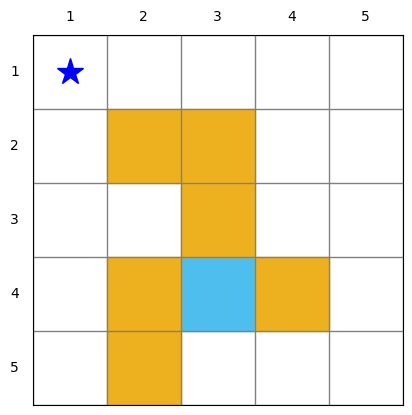

<Figure size 640x480 with 0 Axes>

In [3]:
env = GridWorld()
state = env.reset()
env.render()

policy_matrix=np.random.rand(env.num_states, len(env.action_space))
policy_matrix /= policy_matrix.sum(axis=1)[:, np.newaxis]

env.render(animation_interval=2)
env.add_policy(policy_matrix)
time.sleep(2)